In [277]:
import matplotlib
import matplotlib.animation as animation
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly as py
import plotly.graph_objs as go
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from tensorflow.keras.models import model_from_json
import ffmpeg

plotly.offline.init_notebook_mode(connected=True)

In [4]:
mnist = keras.datasets.mnist

In [6]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11493376/11490434 [==============================] - 1s 0us/step


Label: 7


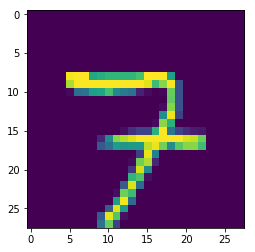

In [29]:
random_index = np.random.randint(len(x_train))
plt.imshow(x_train[random_index])
print("Label: {}".format(y_train[random_index]))

In [90]:
autoencoder_layers = [
    layers.Flatten(input_shape = (28,28)),
    layers.Dense(100, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(2, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dense(100, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(784),
    layers.Reshape((28,28))
]
autoencoder = tf.keras.Sequential(autoencoder_layers)

In [91]:
def autoencoder_loss(y_pred, y_true):
    return K.square(autoencoder.output - autoencoder.input)
autoencoder.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss=autoencoder_loss)

In [92]:
autoencoder.fit(x_train, y_train, epochs = 1000, batch_size = 100, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 6.1840 - val_loss: 5.5482
Epoch 2/1000
60000/60000 [==============================] - 2s 38us/sample - loss: 5.5908 - val_loss: 5.4425
Epoch 3/1000
60000/60000 [==============================] - 2s 39us/sample - loss: 5.4765 - val_loss: 5.3110
Epoch 4/1000
60000/60000 [==============================] - 2s 37us/sample - loss: 5.3677 - val_loss: 5.2163
Epoch 5/1000
60000/60000 [==============================] - 3s 46us/sample - loss: 5.3094 - val_loss: 5.1222
Epoch 6/1000
60000/60000 [==============================] - 3s 46us/sample - loss: 5.2624 - val_loss: 5.0880
Epoch 7/1000
60000/60000 [==============================] - 3s 46us/sample - loss: 5.2340 - val_loss: 5.0562
Epoch 8/1000
60000/60000 [==============================] - 3s 46us/sample - loss: 5.2125 - val_loss: 5.0461
Epoch 9/1000
60000/60000 [==============================] - 3s 46us/sample - l

Epoch 75/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 5.0252 - val_loss: 4.8218
Epoch 76/1000
60000/60000 [==============================] - 3s 47us/sample - loss: 5.0119 - val_loss: 4.8193
Epoch 77/1000
60000/60000 [==============================] - 3s 48us/sample - loss: 5.0113 - val_loss: 4.8441
Epoch 78/1000
60000/60000 [==============================] - 3s 47us/sample - loss: 5.0101 - val_loss: 4.8316
Epoch 79/1000
60000/60000 [==============================] - 3s 46us/sample - loss: 5.0174 - val_loss: 4.8584
Epoch 80/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 5.0134 - val_loss: 4.8241
Epoch 81/1000
60000/60000 [==============================] - 3s 46us/sample - loss: 5.0147 - val_loss: 4.8365
Epoch 82/1000
60000/60000 [==============================] - 3s 48us/sample - loss: 5.0073 - val_loss: 4.8407
Epoch 83/1000
60000/60000 [==============================] - 3s 46us/sample - loss: 5.0145 - val_loss: 4.8169
Epoch 84/1

60000/60000 [==============================] - 3s 44us/sample - loss: 4.9904 - val_loss: 4.8257
Epoch 150/1000
60000/60000 [==============================] - 3s 43us/sample - loss: 4.9970 - val_loss: 4.7994
Epoch 151/1000
60000/60000 [==============================] - 3s 42us/sample - loss: 4.9948 - val_loss: 4.7999
Epoch 152/1000
60000/60000 [==============================] - 3s 42us/sample - loss: 4.9914 - val_loss: 4.7901
Epoch 153/1000
60000/60000 [==============================] - 3s 42us/sample - loss: 4.9947 - val_loss: 4.7969
Epoch 154/1000
60000/60000 [==============================] - 3s 42us/sample - loss: 4.9895 - val_loss: 4.8103
Epoch 155/1000
60000/60000 [==============================] - 3s 42us/sample - loss: 4.9969 - val_loss: 4.7796
Epoch 156/1000
60000/60000 [==============================] - 3s 42us/sample - loss: 4.9946 - val_loss: 4.7997
Epoch 157/1000
60000/60000 [==============================] - 3s 42us/sample - loss: 5.0005 - val_loss: 4.7893
Epoch 158/1000
6

Epoch 223/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 4.9953 - val_loss: 4.7957
Epoch 224/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 4.9911 - val_loss: 4.8090
Epoch 225/1000
60000/60000 [==============================] - 3s 46us/sample - loss: 4.9836 - val_loss: 4.7796
Epoch 226/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 4.9824 - val_loss: 4.7820
Epoch 227/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 4.9873 - val_loss: 4.7687
Epoch 228/1000
60000/60000 [==============================] - 3s 46us/sample - loss: 4.9821 - val_loss: 4.7728
Epoch 229/1000
60000/60000 [==============================] - 3s 47us/sample - loss: 4.9897 - val_loss: 4.7748
Epoch 230/1000
60000/60000 [==============================] - 3s 46us/sample - loss: 4.9836 - val_loss: 4.7675
Epoch 231/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 4.9787 - val_loss: 4.7975
E

Epoch 297/1000
60000/60000 [==============================] - 3s 58us/sample - loss: 4.9864 - val_loss: 4.7456
Epoch 298/1000
60000/60000 [==============================] - 3s 54us/sample - loss: 4.9895 - val_loss: 4.7657
Epoch 299/1000
60000/60000 [==============================] - 4s 64us/sample - loss: 4.9946 - val_loss: 4.7994
Epoch 300/1000
60000/60000 [==============================] - 4s 72us/sample - loss: 4.9754 - val_loss: 4.7735
Epoch 301/1000
60000/60000 [==============================] - 3s 53us/sample - loss: 4.9834 - val_loss: 4.7556
Epoch 302/1000
60000/60000 [==============================] - 3s 50us/sample - loss: 4.9845 - val_loss: 4.7571
Epoch 303/1000
60000/60000 [==============================] - 3s 51us/sample - loss: 4.9761 - val_loss: 4.7652
Epoch 304/1000
60000/60000 [==============================] - 3s 50us/sample - loss: 4.9780 - val_loss: 4.7730
Epoch 305/1000
60000/60000 [==============================] - ETA: 0s - loss: 4.979 - 3s 51us/sample - loss: 4.9

60000/60000 [==============================] - 3s 45us/sample - loss: 4.9872 - val_loss: 4.7666
Epoch 371/1000
60000/60000 [==============================] - 3s 46us/sample - loss: 4.9749 - val_loss: 4.8155
Epoch 372/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 4.9768 - val_loss: 4.7553
Epoch 373/1000
60000/60000 [==============================] - 3s 46us/sample - loss: 4.9864 - val_loss: 4.7514
Epoch 374/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 4.9900 - val_loss: 4.7987
Epoch 375/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 4.9798 - val_loss: 4.7782
Epoch 376/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 4.9790 - val_loss: 4.7726
Epoch 377/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 4.9821 - val_loss: 4.7842
Epoch 378/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 4.9786 - val_loss: 4.8152
Epoch 379/1000
6

Epoch 444/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 4.9778 - val_loss: 4.7836
Epoch 445/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 4.9843 - val_loss: 4.7716
Epoch 446/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 4.9776 - val_loss: 4.7728
Epoch 447/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 4.9895 - val_loss: 4.7989
Epoch 448/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 4.9850 - val_loss: 4.7820
Epoch 449/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 4.9889 - val_loss: 4.7827
Epoch 450/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 4.9846 - val_loss: 4.7721
Epoch 451/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 4.9878 - val_loss: 4.7607
Epoch 452/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 4.9777 - val_loss: 4.7530
E

60000/60000 [==============================] - 3s 45us/sample - loss: 4.9765 - val_loss: 4.7654
Epoch 518/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 4.9775 - val_loss: 4.7571
Epoch 519/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 4.9834 - val_loss: 4.7555
Epoch 520/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 4.9886 - val_loss: 4.7731
Epoch 521/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 4.9766 - val_loss: 4.7846
Epoch 522/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 4.9891 - val_loss: 4.7670
Epoch 523/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 4.9748 - val_loss: 4.7706
Epoch 524/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 4.9799 - val_loss: 4.7897
Epoch 525/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 4.9870 - val_loss: 4.7692
Epoch 526/1000
6

Epoch 591/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 4.9818 - val_loss: 4.7608
Epoch 592/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 4.9815 - val_loss: 4.8438
Epoch 593/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 4.9821 - val_loss: 4.7510
Epoch 594/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 4.9727 - val_loss: 4.7684
Epoch 595/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 4.9873 - val_loss: 4.7693
Epoch 596/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 4.9825 - val_loss: 4.7628
Epoch 597/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 4.9942 - val_loss: 4.7735
Epoch 598/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 4.9867 - val_loss: 4.7564
Epoch 599/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 4.9849 - val_loss: 4.7575
E

Epoch 665/1000
60000/60000 [==============================] - 3s 49us/sample - loss: 4.9921 - val_loss: 4.7528
Epoch 666/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 4.9817 - val_loss: 4.7621
Epoch 667/1000
60000/60000 [==============================] - 3s 47us/sample - loss: 4.9864 - val_loss: 4.7595
Epoch 668/1000
60000/60000 [==============================] - 3s 49us/sample - loss: 4.9825 - val_loss: 4.7694
Epoch 669/1000
60000/60000 [==============================] - 3s 47us/sample - loss: 4.9963 - val_loss: 4.7640
Epoch 670/1000
60000/60000 [==============================] - 3s 46us/sample - loss: 4.9899 - val_loss: 4.7848
Epoch 671/1000
60000/60000 [==============================] - 3s 46us/sample - loss: 4.9829 - val_loss: 4.7870
Epoch 672/1000
60000/60000 [==============================] - 3s 46us/sample - loss: 4.9877 - val_loss: 4.7552
Epoch 673/1000
60000/60000 [==============================] - 3s 48us/sample - loss: 4.9892 - val_loss: 4.7709
E

KeyboardInterrupt: 

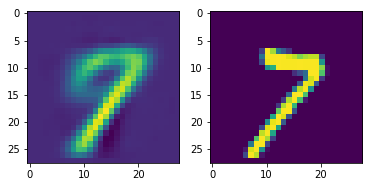

In [124]:
random_index = np.random.randint(len(x_train))
reconstructed_output = autoencoder.predict(x_train[random_index:random_index+1])
fig = plt.figure()
rows, columns = 1, 2
fig.add_subplot(rows, columns, 1)
plt.imshow(reconstructed_output[0])
fig.add_subplot(rows, columns, 2)
plt.imshow(x_train[random_index])

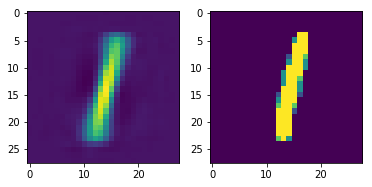

In [120]:
random_index = np.random.randint(len(x_test))
reconstructed_output = autoencoder.predict(x_test[random_index:random_index+1])
fig = plt.figure()
rows, columns = 1, 2
fig.add_subplot(rows, columns, 1)
plt.imshow(reconstructed_output[0])
fig.add_subplot(rows, columns, 2)
plt.imshow(x_test[random_index])

In [131]:
autoencoder_layers_no_dropout = [
    layers.Flatten(input_shape = (28,28)),
    layers.Dense(100, activation=tf.nn.relu),
    layers.Dense(2, activation=tf.nn.relu),
    layers.Dense(100, activation=tf.nn.relu),
    layers.Dense(784),
    layers.Reshape((28,28))
]
autoencoder_no_dropout = tf.keras.Sequential(autoencoder_layers_no_dropout)

In [132]:
def autoencoder_loss(y_pred, y_true):
    return K.square(autoencoder_no_dropout.output - autoencoder_no_dropout.input)
autoencoder_no_dropout.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss=autoencoder_loss)

In [133]:
autoencoder_no_dropout.fit(x_train, y_train, epochs = 1000, batch_size = 100, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1000
60000/60000 [==============================] - 2s 37us/sample - loss: 6.3082 - val_loss: 5.5387
Epoch 2/1000
60000/60000 [==============================] - 2s 31us/sample - loss: 5.2640 - val_loss: 5.0551
Epoch 3/1000
60000/60000 [==============================] - 2s 30us/sample - loss: 4.9537 - val_loss: 4.8124
Epoch 4/1000
60000/60000 [==============================] - 2s 30us/sample - loss: 4.7635 - val_loss: 4.6735
Epoch 5/1000
60000/60000 [==============================] - 2s 30us/sample - loss: 4.6415 - val_loss: 4.5797
Epoch 6/1000
60000/60000 [==============================] - 2s 30us/sample - loss: 4.5701 - val_loss: 4.5267
Epoch 7/1000
60000/60000 [==============================] - 2s 30us/sample - loss: 4.5166 - val_loss: 4.4737
Epoch 8/1000
60000/60000 [==============================] - 2s 30us/sample - loss: 4.4751 - val_loss: 4.4474
Epoch 9/1000
60000/60000 [==============================] - 2s 30us/sample - l

60000/60000 [==============================] - 3s 42us/sample - loss: 3.9658 - val_loss: 4.0592
Epoch 76/1000
60000/60000 [==============================] - 3s 43us/sample - loss: 3.9664 - val_loss: 4.0704
Epoch 77/1000
60000/60000 [==============================] - 3s 48us/sample - loss: 3.9626 - val_loss: 4.0598
Epoch 78/1000
60000/60000 [==============================] - 3s 45us/sample - loss: 3.9615 - val_loss: 4.0614
Epoch 79/1000
60000/60000 [==============================] - 3s 43us/sample - loss: 3.9600 - val_loss: 4.0442
Epoch 80/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 3.9576 - val_loss: 4.0417
Epoch 81/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 3.9555 - val_loss: 4.0545
Epoch 82/1000
60000/60000 [==============================] - 3s 43us/sample - loss: 3.9540 - val_loss: 4.0624
Epoch 83/1000
60000/60000 [==============================] - 3s 43us/sample - loss: 3.9557 - val_loss: 4.0408
Epoch 84/1000
60000/6000

KeyboardInterrupt: 

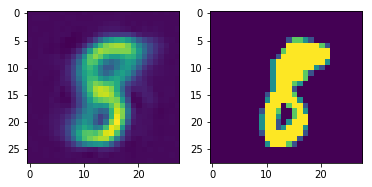

In [152]:
random_index = np.random.randint(len(x_test))
reconstructed_output = autoencoder_no_dropout.predict(x_test[random_index:random_index+1])
fig = plt.figure()
rows, columns = 1, 2
fig.add_subplot(rows, columns, 1)
plt.imshow(reconstructed_output[0])
fig.add_subplot(rows, columns, 2)
plt.imshow(x_test[random_index])

In [261]:
autoencoder_no_dropout.summary()
# Save the weights
autoencoder_no_dropout.save_weights('mnist_autoencoder_weights.h5')

# Save the model architecture
with open('mnist_autoencoder_architecture.json', 'w') as f:
    f.write(autoencoder_no_dropout.to_json())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 202       
_________________________________________________________________
dense_36 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_37 (Dense)             (None, 784)               79184     
_________________________________________________________________
reshape_7 (Reshape)          (None, 28, 28)            0         
Total params: 158,186
Trainable params: 158,186
Non-trainable params: 0
_________________________________________________________________


In [294]:
# with a Sequential model

def get_compression_function(autoencoder):
    return K.function([autoencoder.layers[0].input],[autoencoder.layers[2].output])

def get_reconstruction_function(autoencoder):
    return K.function([autoencoder.layers[3].input],[autoencoder.layers[-1].output])



In [ ]:
get_compressed_input = K.function([autoencoder_no_dropout.layers[0].input],
                                  [autoencoder_no_dropout.layers[2].output])
compressed_inputs = get_compressed_input([x_test[:5000]])[0]
# Create a trace
random_colours = ['rgba({},{},{},.8)'.format(*np.random.randint(255, size=3)) for ind in range(10)]

trace = go.Scatter(
    x = compressed_inputs[:,0],
    y = compressed_inputs[:,1],
    mode = 'markers',
    marker = dict(
    size = 10,
    color = [random_colours[label] for label in y_test[:5000]],
    ),
    text = y_test[:5000])

data = [trace]

# Plot and embed in ipython notebook!
py.offline.plot(data, filename='autoencoder_no_dropout_mnist')

In [296]:
get_compressed_input = get_compression_function(autoencoder)
compressed_inputs = get_compressed_input([x_test[:5000]])[0]
# Create a trace
random_colours = ['rgba({},{},{},.8)'.format(*np.random.randint(255, size=3)) for ind in range(10)]

trace = go.Scatter(
    x = compressed_inputs[:,0],
    y = compressed_inputs[:,1],
    mode = 'markers',
    marker = dict(
    size = 10,
    color = [random_colours[label] for label in y_test[:5000]],
    ),
    text = y_test[:5000])

data = [trace]

# Plot and embed in ipython notebook!
py.offline.iplot(data, filename='autoencoder_no_dropout_mnist')

In [286]:
xlim, ylim = 20.0, 25.0
x = widgets.FloatSlider(
    value=0,
    min=0,
    max=xlim,
    step=0.1,
    description = 'x')
y = widgets.FloatSlider(
    value=7.5,
    min=0,
    max=ylim,
    step=0.1,
    description = 'y')

def show_reconstruction(x,y):
    plt.subplot(1, 2, 1)
    plt.plot(x, y, 'o')
    plt.xlim(0,xlim)
    plt.ylim(0,ylim)

    plt.subplot(1, 2, 2)
    #fig = matplotlib.pyplot.gcf()
    #fig.set_size_inches(10., 10.)
    plt.imshow(reconstruct_digit(x,y))
    
    return plt


reconstruction_func = get_reconstruction_function(autoencoder_no_dropout) 
def reconstruct_digit(x, y):
    return reconstruction_func(np.array([[x, y]]))[0][0]
out = widgets.interactive_output(show_reconstruction, {'x': x, 'y': y})

widgets.HBox([widgets.VBox([x,y]), out])


In [290]:
frames = 100
fig = plt.figure()
for ind, x in enumerate(np.linspace(0, xlim, frames)):
    plt = show_reconstruction(x, 7.5)
    fig.savefig('clips/{}.png'.format(ind))
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [292]:
autoencoder3d_layers_no_dropout = [
    layers.Flatten(input_shape = (28,28)),
    layers.Dense(100, activation=tf.nn.relu),
    layers.Dense(3, activation=tf.nn.relu),
    layers.Dense(100, activation=tf.nn.relu),
    layers.Dense(784),
    layers.Reshape((28,28))
]
autoencoder3d_no_dropout = tf.keras.Sequential(autoencoder3d_layers_no_dropout)

def autoencoder_loss(y_pred, y_true):
    return K.square(autoencoder3d_no_dropout.output - autoencoder3d_no_dropout.input)
autoencoder3d_no_dropout.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss=autoencoder_loss)

In [293]:
autoencoder3d_no_dropout.fit(x_train, y_train, epochs = 1000, batch_size = 100, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 6.3281 - val_loss: 6.0297
Epoch 2/1000
60000/60000 [==============================] - 2s 33us/sample - loss: 5.8721 - val_loss: 5.8197
Epoch 3/1000
60000/60000 [==============================] - 2s 34us/sample - loss: 5.7736 - val_loss: 5.7251
Epoch 4/1000
60000/60000 [==============================] - 2s 33us/sample - loss: 5.0433 - val_loss: 4.5316
Epoch 5/1000
60000/60000 [==============================] - 2s 32us/sample - loss: 4.3600 - val_loss: 4.2682
Epoch 6/1000
60000/60000 [==============================] - 2s 32us/sample - loss: 4.1679 - val_loss: 4.1134
Epoch 7/1000
60000/60000 [==============================] - 2s 31us/sample - loss: 4.0432 - val_loss: 4.0040
Epoch 8/1000
60000/60000 [==============================] - 2s 31us/sample - loss: 3.9529 - val_loss: 3.9276
Epoch 9/1000
60000/60000 [==============================] - 2s 32us/sample - l

60000/60000 [==============================] - 2s 37us/sample - loss: 3.4949 - val_loss: 3.5879
Epoch 76/1000
60000/60000 [==============================] - 2s 37us/sample - loss: 3.4952 - val_loss: 3.5922
Epoch 77/1000
60000/60000 [==============================] - 2s 38us/sample - loss: 3.4917 - val_loss: 3.5862
Epoch 78/1000
60000/60000 [==============================] - 2s 39us/sample - loss: 3.4926 - val_loss: 3.5804
Epoch 79/1000
60000/60000 [==============================] - 2s 38us/sample - loss: 3.4897 - val_loss: 3.5848
Epoch 80/1000
60000/60000 [==============================] - 2s 40us/sample - loss: 3.4895 - val_loss: 3.5860
Epoch 81/1000
60000/60000 [==============================] - 2s 38us/sample - loss: 3.4887 - val_loss: 3.5947
Epoch 82/1000
60000/60000 [==============================] - 2s 41us/sample - loss: 3.4844 - val_loss: 3.5808
Epoch 83/1000
60000/60000 [==============================] - 2s 38us/sample - loss: 3.4867 - val_loss: 3.5847
Epoch 84/1000
60000/6000

Epoch 149/1000
60000/60000 [==============================] - 3s 44us/sample - loss: 3.4310 - val_loss: 3.5580
Epoch 150/1000
60000/60000 [==============================] - 3s 42us/sample - loss: 3.4305 - val_loss: 3.5626
Epoch 151/1000
60000/60000 [==============================] - 2s 39us/sample - loss: 3.4301 - val_loss: 3.5662
Epoch 152/1000
60000/60000 [==============================] - 2s 40us/sample - loss: 3.4299 - val_loss: 3.5664
Epoch 153/1000
60000/60000 [==============================] - 2s 40us/sample - loss: 3.4295 - val_loss: 3.5642
Epoch 154/1000
60000/60000 [==============================] - 2s 41us/sample - loss: 3.4294 - val_loss: 3.5761
Epoch 155/1000
60000/60000 [==============================] - 2s 40us/sample - loss: 3.4290 - val_loss: 3.5537
Epoch 156/1000
60000/60000 [==============================] - 2s 42us/sample - loss: 3.4278 - val_loss: 3.5539
Epoch 157/1000
60000/60000 [==============================] - 3s 42us/sample - loss: 3.4257 - val_loss: 3.5613
E

Epoch 223/1000
60000/60000 [==============================] - 2s 39us/sample - loss: 3.3996 - val_loss: 3.5556
Epoch 224/1000
60000/60000 [==============================] - 2s 38us/sample - loss: 3.3996 - val_loss: 3.5606
Epoch 225/1000
60000/60000 [==============================] - 2s 38us/sample - loss: 3.3985 - val_loss: 3.5535
Epoch 226/1000
60000/60000 [==============================] - 2s 39us/sample - loss: 3.3983 - val_loss: 3.5503
Epoch 227/1000
60000/60000 [==============================] - 2s 39us/sample - loss: 3.3994 - val_loss: 3.5709
Epoch 228/1000
60000/60000 [==============================] - 2s 39us/sample - loss: 3.3996 - val_loss: 3.5553
Epoch 229/1000
60000/60000 [==============================] - 2s 40us/sample - loss: 3.3980 - val_loss: 3.5617
Epoch 230/1000
60000/60000 [==============================] - 2s 39us/sample - loss: 3.3970 - val_loss: 3.5472
Epoch 231/1000
60000/60000 [==============================] - 2s 40us/sample - loss: 3.3986 - val_loss: 3.5547
E

KeyboardInterrupt: 

In [ ]:
get_compressed_input = get_compression_function(autoencoder3d_no_dropout)
compressed_inputs = get_compressed_input([x_test[:5000]])[0]
# Create a trace
random_colours = ['rgba({},{},{},.8)'.format(*np.random.randint(255, size=3)) for ind in range(10)]

trace = go.Scatter3d(
    x = compressed_inputs[:,0],
    y = compressed_inputs[:,1],
    z = compressed_inputs[:,2],
    mode = 'markers',
    marker = dict(
    size = 10,
    color = [random_colours[label] for label in y_test[:5000]],
    ),
    text = y_test[:5000])

data = [trace]

# Plot and embed in ipython notebook!
py.offline.plot(data, filename='autoencoder3d_no_dropout_mnist')

In [301]:
autoencoder3d_no_dropout.summary()
# Save the weights
autoencoder3d_no_dropout.save_weights('mnist_autoencoder3d_weights.h5')

# Save the model architecture
with open('mnist_autoencoder3d_architecture.json', 'w') as f:
    f.write(autoencoder3d_no_dropout.to_json())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_43 (Dense)             (None, 3)                 303       
_________________________________________________________________
dense_44 (Dense)             (None, 100)               400       
_________________________________________________________________
dense_45 (Dense)             (None, 784)               79184     
_________________________________________________________________
reshape_9 (Reshape)          (None, 28, 28)            0         
Total params: 158,387
Trainable params: 158,387
Non-trainable params: 0
_________________________________________________________________
